Importing Necessary Libraries

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import PIL
import tensorflow as tf
from tensorflow import keras
import numpy as np
import imghdr

Remove Dodgy Images

In [ ]:
data_dir = "/content/drive/MyDrive/Image Classification"
image_exts=['jpeg','jpg','bmp','png']

for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir ,image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except:
      print('Issue with image {}'.format(image_path))


In [ ]:
for i  in os.listdir(data_dir):
  print(len(os.listdir(os.path.join(data_dir,i))))

381
381


Load Data using Keras Utils

In [ ]:
data=tf.keras.utils.image_dataset_from_directory(data_dir,batch_size=16)

Found 762 files belonging to 2 classes.


In [ ]:
data_iterator=data.as_numpy_iterator()
batch = data_iterator.next()

In [ ]:
print(len(data))
print(len(batch))
print(batch[0].shape)
print(batch[0])

48
2
(16, 256, 256, 3)
[[[[157.95508  161.       169.64062 ]
   [152.95703  157.22656  156.47461 ]
   [122.95703  128.95703  117.40625 ]
   ...
   [190.69531  170.59375  176.7168  ]
   [178.48242  154.02148  157.29102 ]
   [178.91016  151.04492  148.31445 ]]

  [[162.33873  165.38365  172.95355 ]
   [156.18127  160.4508   159.69885 ]
   [133.87128  139.74536  128.5723  ]
   ...
   [182.6079   162.94098  167.25647 ]
   [169.02867  145.12828  145.74615 ]
   [168.31012  140.47008  137.07834 ]]

  [[166.25044  169.29536  175.51472 ]
   [157.76201  161.99548  161.42383 ]
   [140.97539  146.5433   136.76384 ]
   ...
   [173.61322  154.01947  155.51993 ]
   [164.3745   141.10901  138.5417  ]
   [166.28966  138.73692  133.50089 ]]

  ...

  [[ 45.923393  61.743706  52.731987]
   [ 41.564075  52.75548   70.1461  ]
   [ 74.64363   80.19441  134.2159  ]
   ...
   [207.29633  200.23337  177.22316 ]
   [207.4701   202.33533  178.57047 ]
   [197.52042  191.30978  167.69229 ]]

  [[ 59.002132  74.822

In [ ]:
batch[1]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int32)

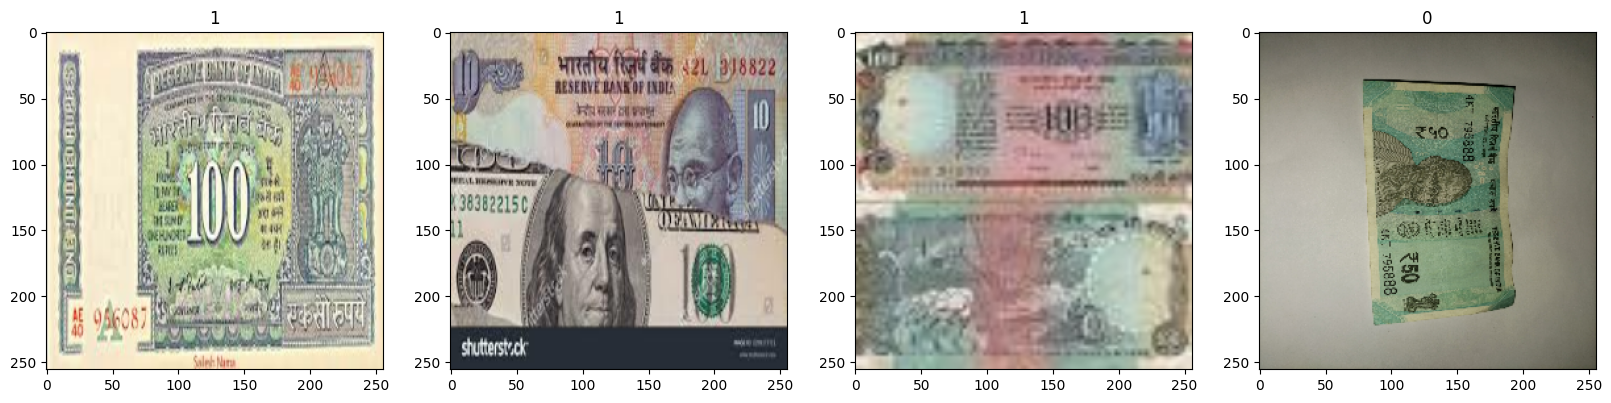

In [ ]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

Scale data

In [ ]:
data = data.map(lambda x,y: (x/255,y) )
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

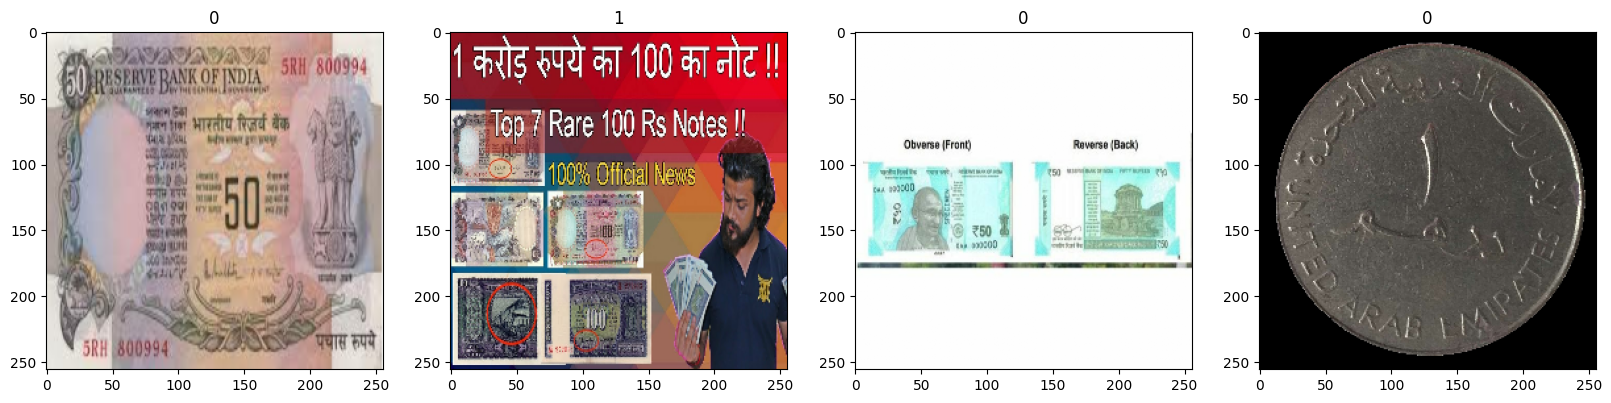

In [ ]:
fig,ax = plt.subplots(ncols =4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

Split Data

In [ ]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1
print(train_size, val_size, test_size )

33 9 5


In [ ]:
train = data.take(train_size)
test = data.skip(train_size).take(test_size)
val = data.skip(train_size+test_size).take(val_size)

In [ ]:
train_iterator = train.as_numpy_iterator()
len(train_iterator.next()[0])

16

Build Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Flatten, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(16,(3,3),1,activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation = "sigmoid"))


In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

Train

In [ ]:
logdir= "/content/drive/MyDrive/logdir"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train,epochs=20,validation_data = val,callbacks=[tensorboard_callback])

Epoch 1/20
33/33 [==============================] - 32s 924ms/step - loss: 0.0445 - accuracy: 0.9830 - val_loss: 1.1380 - val_accuracy: 0.7986
Epoch 2/20
33/33 [==============================] - 23s 657ms/step - loss: 0.0428 - accuracy: 0.9886 - val_loss: 0.5645 - val_accuracy: 0.8889
Epoch 3/20
33/33 [==============================] - 31s 919ms/step - loss: 0.0188 - accuracy: 0.9943 - val_loss: 0.6192 - val_accuracy: 0.9028
Epoch 4/20
33/33 [==============================] - 21s 589ms/step - loss: 0.0168 - accuracy: 0.9924 - val_loss: 0.7715 - val_accuracy: 0.8750
Epoch 5/20
33/33 [==============================] - 32s 920ms/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.8198 - val_accuracy: 0.8889
Epoch 6/20
33/33 [==============================] - 23s 615ms/step - loss: 0.0518 - accuracy: 0.9867 - val_loss: 0.6778 - val_accuracy: 0.8750
Epoch 7/20
33/33 [==============================] - 22s 628ms/step - loss: 0.0978 - accuracy: 0.9754 - val_loss: 0.9462 - val_accuracy: 0.8681

Evaluation

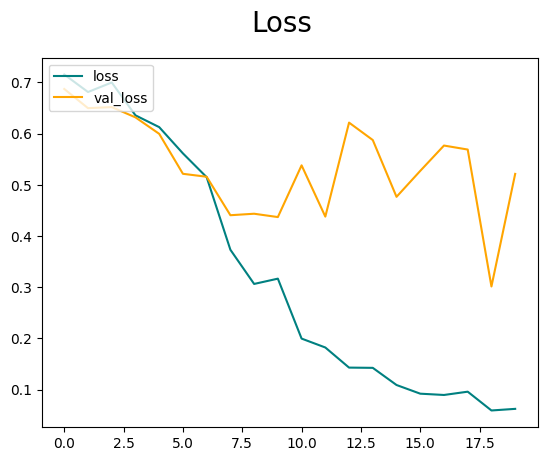

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color="teal",label="loss")
plt.plot(hist.history['val_loss'],color="orange",label="val_loss")
plt.suptitle("Loss",fontsize=20)
plt.legend(loc="upper left")
plt.show()


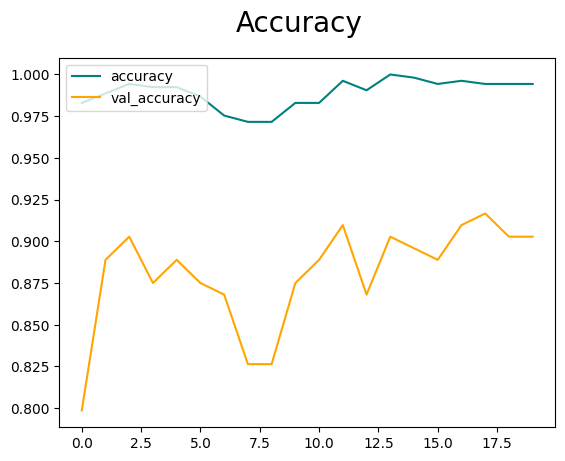

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color="teal",label="accuracy")
plt.plot(hist.history['val_accuracy'],color="orange",label="val_accuracy")
plt.suptitle("Accuracy",fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [ ]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [ ]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 34ms/step


In [ ]:
print(f"Precision: {pre.result().numpy()} Recall: {re.result().numpy()} Accuracy: {acc.result().numpy()}")

Precision: 1.0 Recall: 0.9555555582046509 Accuracy: 0.9750000238418579


Test

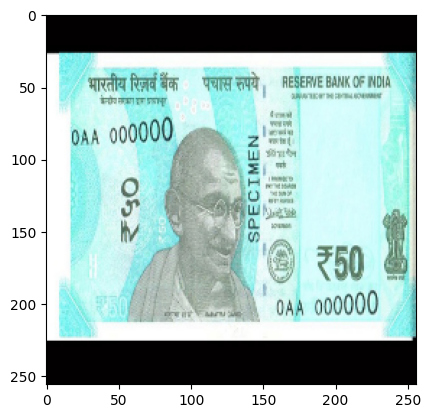

In [ ]:
img=cv2.imread("/content/drive/MyDrive/Test Images/Test50.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))
print(yhat)
if yhat>=0.5:
  print("Hundred Rupees")
else:
  print("Fifty Rupees")

1/1 [==============================] - 0s 25ms/step
[[8.632207e-05]]
Fifty Rupees


1/1 [==============================] - 0s 36ms/step
[[2.7308677e-05]]
Fifty Rupees


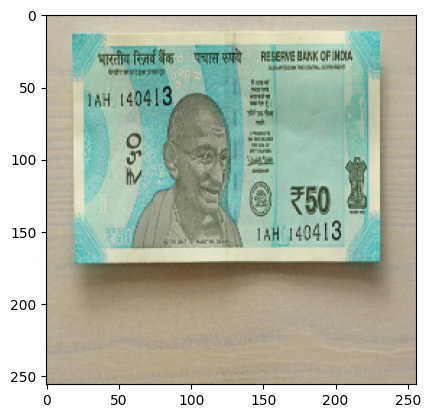

In [ ]:
img=cv2.imread("/content/drive/MyDrive/Test Images/FiftyTest.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
yhat = model.predict(np.expand_dims(resize/255,0))
print(yhat)
if yhat>=0.5:
  print("Hundred Rupees")
else:
  print("Fifty Rupees")